In [13]:
import json
from os import walk
from os.path import isfile, join
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [39]:
filepath = "/Users/matt/repos/thermal_state_prep/numerics/data/single_shot_harmonic/alpha_fixed_point.json"
with open(filepath) as f:
    j = json.load(f)
    inputs = j["inputs"]
    outputs = j["outputs"]
    num_samples = j["num_samples"]
    dim_sys = j["dim_sys"]
    label = j["label"]
    if len(inputs) != len(outputs):
        raise Exception("inputs and outputs are not the same length.")
    print("len of inputs: ", len(inputs))
alphas, beta_envs, beta_syss, times = set(), set(), set(), set()
for (alpha, beta_env, beta_sys, time) in inputs:
    alphas.add(alpha)
    beta_envs.add(beta_env)
    beta_syss.add(beta_sys)
    times.add(time)
alphas = list(alphas)
alphas.sort()
beta_envs = list(beta_envs)
beta_envs.sort()
beta_syss = list(beta_syss)
beta_syss.sort()
times = list(times)
times.sort()

print("alphas")
print(alphas)
print("beta_envs")
print(beta_envs)
print("beta_syss")
print(beta_syss)
print("times")
print(times)
    

len of inputs:  250
alphas
[1e-06, 1.2648552168552959e-06, 1.5998587196060574e-06, 2.0235896477251557e-06, 2.5595479226995334e-06, 3.23745754281764e-06, 4.094915062380427e-06, 5.179474679231212e-06, 6.5512855685955095e-06, 8.286427728546843e-06, 1.0481131341546853e-05, 1.3257113655901082e-05, 1.67683293681101e-05, 2.1209508879201926e-05, 2.6826957952797274e-05, 3.39322177189533e-05, 4.291934260128778e-05, 5.4286754393238594e-05, 6.866488450042999e-05, 8.68511373751352e-05, 0.00010985411419875583, 0.00013894954943731373, 0.00017575106248547912, 0.00022229964825261955, 0.0002811768697974231, 0.00035564803062231287, 0.0004498432668969444, 0.0005689866029018293, 0.0007196856730011522, 0.0009102981779915217, 0.0011513953993264468, 0.0014563484775012444, 0.0018420699693267163, 0.002329951810515372, 0.0029470517025518097, 0.003727593720314938, 0.004714866363457394, 0.005963623316594642, 0.007543120063354615, 0.009540954763499945, 0.012067926406393288, 0.015264179671752334, 0.01930697728883249

beta_env, beta_sys, time 1.0 1.0 100.0
alpha, mean_dist =  0.1 ,  0.07589784045097686
alpha, mean_dist =  0.07906043210907701 ,  0.06059692160105381
alpha, mean_dist =  0.06250551925273973 ,  0.05276448375378708
alpha, mean_dist =  0.04941713361323833 ,  0.04023984780537781
alpha, mean_dist =  0.03906939937054617 ,  0.03086531038619099
alpha, mean_dist =  0.030888435964774818 ,  0.025662175731900164
alpha, mean_dist =  0.02442053094548651 ,  0.020274966279646804
alpha, mean_dist =  0.019306977288832496 ,  0.015726694693821992
alpha, mean_dist =  0.015264179671752334 ,  0.01266872430328402
alpha, mean_dist =  0.012067926406393288 ,  0.009286125965139086
alpha, mean_dist =  0.009540954763499945 ,  0.007308170899227018
alpha, mean_dist =  0.007543120063354615 ,  0.0057616652588133935
alpha, mean_dist =  0.005963623316594642 ,  0.004492101510807261
alpha, mean_dist =  0.004714866363457394 ,  0.003503527193937714
alpha, mean_dist =  0.003727593720314938 ,  0.002873761303531099
alpha, mean_d

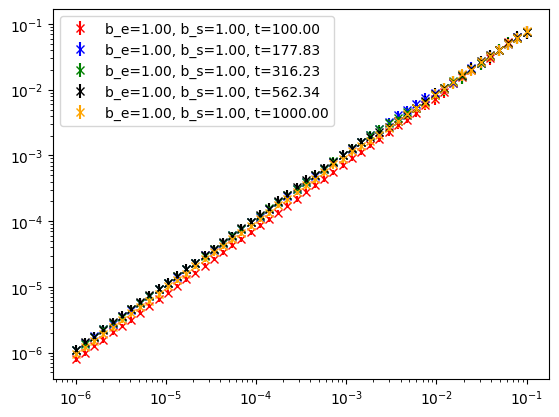

In [44]:

alpha_fixed_params = [(beta_envs[0], beta_syss[0], times[ix]) for ix in range(len(times))]
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange']
color_count = 0
for ( beta_env_0, beta_sys_0, time_0) in alpha_fixed_params:
    print("beta_env, beta_sys, time", beta_env_0, beta_sys_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, beta_sys, time) = inputs[ix]
        (original_dist, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if beta_sys == beta_sys_0 and beta_env == beta_env_0 and time == time_0:
            x.append(alpha)
            y.append(-original_dist + mean_dist)
            yerr.append(std_dist)

            print("alpha, mean_dist = ", alpha, ", ", mean_dist)
    plt.errorbar(x, y, yerr, marker='x', linestyle='none', label="b_e={:.2f}, b_s={:.2f}, t={:.2f}".format(beta_env_0, beta_sys_0, time_0), color=colors[color_count])
    color_count += 1
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

alpha, beta_env, time 1e-05 1.0 200.0
beta_sys, mean_dist =  0.1 ,  0.5555535570281748
beta_sys, mean_dist =  0.10481131341546858 ,  0.5518225081664451
beta_sys, mean_dist =  0.10985411419875583 ,  0.547898692345376
beta_sys, mean_dist =  0.11513953993264472 ,  0.543772658597863
beta_sys, mean_dist =  0.12067926406393285 ,  0.5394345496901046
beta_sys, mean_dist =  0.12648552168552962 ,  0.5348742816294638
beta_sys, mean_dist =  0.13257113655901093 ,  0.530081465146731
beta_sys, mean_dist =  0.13894954943731375 ,  0.525045473524017
beta_sys, mean_dist =  0.14563484775012436 ,  0.5197554701415804
beta_sys, mean_dist =  0.15264179671752334 ,  0.5142004395762914
beta_sys, mean_dist =  0.15998587196060582 ,  0.5083692557261801
beta_sys, mean_dist =  0.16768329368110083 ,  0.502250768316159
beta_sys, mean_dist =  0.1757510624854792 ,  0.49583379658666715
beta_sys, mean_dist =  0.1842069969326716 ,  0.4891072478176749
beta_sys, mean_dist =  0.193069772888325 ,  0.4820602214911354
beta_sys, m

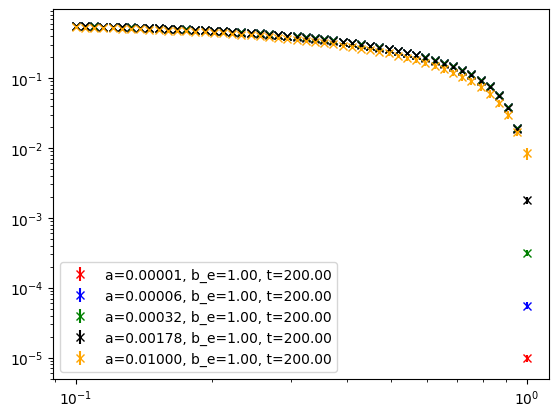

In [38]:
beta_sys_fixed_params = [(alphas[ix], beta_envs[0], times[0]) for ix in range(len(alphas))]
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange']
color_count = 0
for (alpha_0, beta_env_0, time_0) in beta_sys_fixed_params:
    print("alpha, beta_env, time", alpha_0, beta_env_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, beta_sys, time) = inputs[ix]
        (original_dist, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if alpha == alpha_0 and beta_env == beta_env_0 and time == time_0:
            x.append(beta_sys)
            y.append(mean_dist)
            yerr.append(std_dist)

            print("beta_sys, mean_dist = ", beta_sys, ", ", mean_dist)
    plt.errorbar(x, y, yerr, marker='x', linestyle='none', label="a={:.5f}, b_e={:.2f}, t={:.2f}".format(alpha_0, beta_env_0, time_0), color=colors[color_count])
    color_count += 1
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()
